# Study of Analogy based Learning - Image Classification


In this notebook, we perform the following task.

- Task 2: Compute the Euclidean Distance between an Image and Its Augmented Versions


In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

from sklearn.metrics.pairwise import euclidean_distances

from scipy.ndimage.interpolation import shift, rotate

from tensorflow import keras

## MNIST

We directly load the MNIST dataset using the Keras API:
https://keras.io/api/datasets/mnist/

The train set contains 60,000 images, and the test set contains 10,000 images.

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale the data
X_train = X_train/255.0
X_test = X_test/255.0


print("\nShape of Training Samples: ", X_train.shape)
print("Shape of Training Labels: ", y_train.shape)

print("\nShape of Testing Samples: ", X_test.shape)
print("Shape of Testing Labels: ", y_test.shape)


Shape of Training Samples:  (60000, 28, 28)
Shape of Training Labels:  (60000,)

Shape of Testing Samples:  (10000, 28, 28)
Shape of Testing Labels:  (10000,)


# MNIST - Task 2: Compute the Euclidean Distance between an Image and Its Augmented Versions

For task 2, we create augmented versions of the same image by distorting it through:
- Shifting: left & below
- Rotating: 90 degree & 180 degree

## Functions for Creating Augmented Images

In [3]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


def rotate_image(image, angle):
    image = image.reshape((28, 28))
    rotated_image = rotate(image, angle, cval=0, mode="constant", reshape=False)
    #rotated_image = rotate(image, angle)
    return rotated_image.reshape([-1])

## Analyze Similarity Between an Image and Its Augmented Versions

We plot the original & the augmented images. Below each image we show its Euclidean distance from the original image.

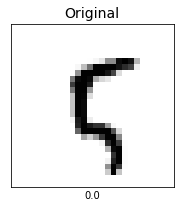

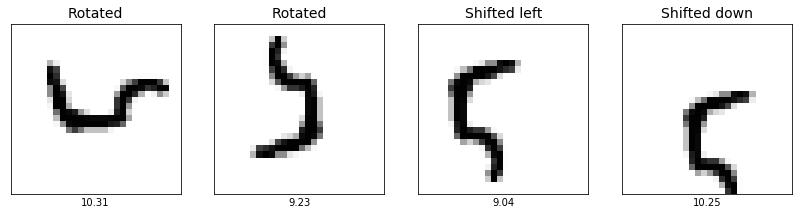

In [4]:
# Select an image
original_image = X_train[100]

distance_original = euclidean_distances(original_image.reshape(1, 784), original_image.reshape(1, 784))

# Create two rotated versions of the image
rotated_image_1 = rotate_image(original_image, 90)
rotated_image_2 = rotate_image(original_image, 180)

# Create two shifted versions of the image
shifted_image_down = shift_image(original_image, 0, 5)
shifted_image_left = shift_image(original_image, -5, 0)


# Computed the Euclidean distance of the augmented images from the original image
distance_rotated_1 = euclidean_distances(original_image.reshape(1, 784), rotated_image_1.reshape(1, 784))
distance_rotated_2 = euclidean_distances(original_image.reshape(1, 784), rotated_image_2.reshape(1, 784))

distance_shifted_1 = euclidean_distances(original_image.reshape(1, 784), shifted_image_down.reshape(1, 784))
distance_shifted_2 = euclidean_distances(original_image.reshape(1, 784), shifted_image_left.reshape(1, 784))


# Plot the original & the augmented images
# Below each image we show its Euclidean distance from the original image (top-left).
plt.figure(figsize=(3,3))
plt.title("Original", fontsize=14)
plt.imshow(original_image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_original[0][0], 2))
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(figsize=(14,8))
plt.subplot(141)
plt.title("Rotated", fontsize=14)
plt.imshow(rotated_image_1.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_rotated_1[0][0], 2))
plt.xticks([])
plt.yticks([])

plt.subplot(142)
plt.title("Rotated", fontsize=14)
plt.imshow(rotated_image_2.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_rotated_2[0][0], 2))
plt.xticks([])
plt.yticks([])

plt.subplot(143)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_shifted_1[0][0], 2))
plt.xticks([])
plt.yticks([])

plt.subplot(144)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_shifted_2[0][0], 2))
plt.xticks([])
plt.yticks([])

plt.show()

## MNIST Task 2 - Observation

Observe that the distance between the image of "5" (original image) and the augmented versions of it is greater than 9. However, in task 1, we observed that the intra-class distance was smaller than 9. Current task indicates that after augmenting the image, the intra-class distance becomes larger. In other words, the augmented images become dissimilar to the original image when we compare them pixel by pixel.

# CIFAR-10

We directly load the CIFAR-10 dataset using the Keras API:
https://keras.io/api/datasets/cifar10/

The train set contains 50,000 images, and the test set contains 10,000 images.

In [5]:
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

# Scale the data
X_train_cifar = X_train_cifar/255.0
X_test_cifar = X_test_cifar/255.0

print("\nShape of Training Samples: ", X_train_cifar.shape)
print("Shape of Training Labels: ", y_train_cifar.shape)

print("\nShape of Testing Samples: ", X_test_cifar.shape)
print("Shape of Testing Labels: ", y_test_cifar.shape)


Shape of Training Samples:  (50000, 32, 32, 3)
Shape of Training Labels:  (50000, 1)

Shape of Testing Samples:  (10000, 32, 32, 3)
Shape of Testing Labels:  (10000, 1)


## CIFAR-10: Create a List of Class Names

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# CIFAR-10 - Task 2: Compute the Euclidean Distance between an Image and Its Augmented Versions

For task 2, we create augmented versions of the same image by distorting it through:
- Shifting: left & below
- Rotating: 90 degree & 180 degree

## Functions for Creating Augmented Images

In [7]:
def shift_image_cifar(image, dx, dy):
    image = image.reshape((32, 32, 3))
    shifted_image = shift(image, [dy, dx, 0], cval=0, mode="constant")
    return shifted_image.reshape([-1])


def rotate_image_cifar(image, angle):
    image = image.reshape((32, 32, 3))
    rotated_image = rotate(image, angle, cval=0, mode="constant", reshape=False)
    #rotated_image = rotate(image, angle)
    return rotated_image.reshape([-1])

## Analyze Similarity Between an Image and Its Augmented Versions

We plot the original & the augmented images. Below each image we show its Euclidean distance from the original image.

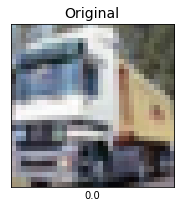

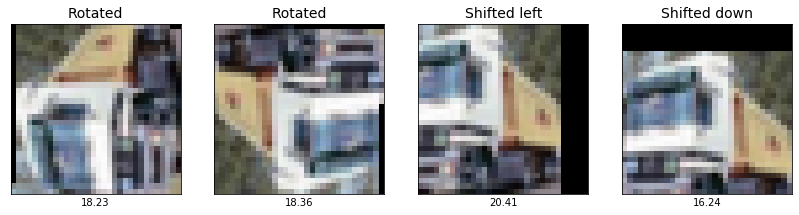

In [8]:
# Select an image
original_image_cifar = X_train_cifar[1]

distance_original_cifar = euclidean_distances(original_image_cifar.reshape(1, 3072), original_image_cifar.reshape(1, 3072))

# Create two rotated versions of the image
rotated_image_1_cifar = rotate_image_cifar(original_image_cifar, 90)
rotated_image_2_cifar = rotate_image_cifar(original_image_cifar, 180)

# Create two shifted versions of the image
shifted_image_down_cifar = shift_image_cifar(original_image_cifar, 0, 5)
shifted_image_left_cifar = shift_image_cifar(original_image_cifar, -5, 0)


# Computed the Euclidean distance of the augmented images from the original image
distance_rotated_1_cifar = euclidean_distances(original_image_cifar.reshape(1, 3072), rotated_image_1_cifar.reshape(1, 3072))
distance_rotated_2_cifar = euclidean_distances(original_image_cifar.reshape(1, 3072), rotated_image_2_cifar.reshape(1, 3072))

distance_shifted_1_cifar = euclidean_distances(original_image_cifar.reshape(1, 3072), shifted_image_down_cifar.reshape(1, 3072))
distance_shifted_2_cifar = euclidean_distances(original_image_cifar.reshape(1, 3072), shifted_image_left_cifar.reshape(1, 3072))


# Plot the original & the augmented images
# Below each image we show its Euclidean distance from the original image (top-left)
plt.figure(figsize=(3,3))
plt.title("Original", fontsize=14)
plt.imshow(original_image_cifar.reshape(32, 32, 3), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_original_cifar[0][0], 2))
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(figsize=(14,8))
plt.subplot(141)
plt.title("Rotated", fontsize=14)
plt.imshow(rotated_image_1_cifar.reshape(32, 32, 3), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_rotated_1_cifar[0][0], 2))
plt.xticks([])
plt.yticks([])

plt.subplot(142)
plt.title("Rotated", fontsize=14)
plt.imshow(rotated_image_2_cifar.reshape(32, 32, 3), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_rotated_2_cifar[0][0], 2))
plt.xticks([])
plt.yticks([])

plt.subplot(143)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left_cifar.reshape(32, 32, 3), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_shifted_1_cifar[0][0], 2))
plt.xticks([])
plt.yticks([])

plt.subplot(144)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down_cifar.reshape(32, 32, 3), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_shifted_2_cifar[0][0], 2))
plt.xticks([])
plt.yticks([])

plt.show()

## CIFAR-10 Task 2 - Observation


Observe that the distance between the image of "truck" (original image) and the augmented versions of it are in the range of 15 to 22. This range is similar to what we observed in task 1. It indicates that there is no significant difference between the original image and its augmented versions. The pixel-wise comparison doesn't reveal the fact that images are distorted or "different".

### Explanation

The dimension of the CIFAR-10 images (i.e., 3072) is significantly larger than that of the MNIST images (i.e., 784). Thus, CIFAR-10 images are more prone to the **curse of dimensionality**: there are no nearest neighbors in high dimension. In this task, the original image and its three augmented versions are equally apart. This is a direct consequence of the high-dimensional pixel-based similarity measure.